In [1]:
import matplotlib
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import VotingClassifier
import warnings #to remove the warnings
import random
import sys
sys.path.append('../../_hepers_')
from genNewVals import generateNewFeatureValMultiple
from genSynData import generateSyntheticDataset
from subsampleData import subsample
from genFillNulls import *
warnings.filterwarnings('ignore')


In [2]:


def trainModels(X_train, X_test, y_train, y_test):
    '''Naive Bayes'''
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred = (nb.predict(X_test))
    naiveBaysScores = f1_score(y_test, y_pred)

    '''Logistic Regression'''

    modelLogistic = LogisticRegression()
    modelLogistic.fit(X_train,y_train)
    y_pred = modelLogistic.predict(X_test)
    logisticRegressionScores = f1_score(y_test, y_pred)

    '''SVM'''

    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    svmRegressionScores = f1_score(y_test, y_pred)
    
    '''Decision Tree'''

    clf = DecisionTreeClassifier()
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    decisionTreeRegressionScores = f1_score(y_test, y_pred)

    '''Voting Classifier'''

    votingCl = VotingClassifier(
            estimators =    [('gnb', GaussianNB()),
                             ('lr',  LogisticRegression()),
                             ('svm', SVC(kernel='linear')),
                             ('dtc', DecisionTreeClassifier(random_state=42))], 
            voting='hard')
    votingCl.fit(X_train, y_train)
    y_pred = votingCl.predict(X_test)
    votingClassifierScore = f1_score(y_test, y_pred)

    return naiveBaysScores, logisticRegressionScores, svmRegressionScores, decisionTreeRegressionScores, votingClassifierScore

def printOutputs(naiveBayesScore, LogScore, SVMScore, DTScore, VoteScore):
    print('NB Mean Scores: {}'.format(np.mean(naiveBayesScore)))
    print('LR Mean Scores: {}'.format(np.mean(LogScore)))
    print('SVM Mean Scores: {}'.format(np.mean(SVMScore)))
    print('DT Mean Scores: {}'.format(np.mean(DTScore)))
    print('VC Mean Scores: {}'.format(np.mean(VoteScore)))

def summarizeMeans(cumulativeList):
    meanList = []
    for i in cumulativeList:
        temp = []
        for j in range(len(i)):
            temp.append(np.mean(i[j]))
        meanList.append(temp)    
    return meanList

In [3]:
raw_df = pd.read_csv('../../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.int)
print(df.shape)
print(df)

for i in df:
    df[i] = df[i].astype(np.int)


(683, 11)
          ID Thickness SizeUniformity ShapeUniformity Adhesion Size  \
0    1000025         5              1               1        1    2   
1    1002945         5              4               4        5    7   
2    1015425         3              1               1        1    2   
3    1016277         6              8               8        1    3   
4    1017023         4              1               1        3    2   
..       ...       ...            ...             ...      ...  ...   
678   776715         3              1               1        1    3   
679   841769         2              1               1        1    2   
680   888820         5             10              10        3    7   
681   897471         4              8               6        4    3   
682   897471         4              8               8        5    4   

     BareNuclei Bland Chromatin Nucleoli Mitoses Diagnosis  
0             1               3        1       1         0  
1            10

In [4]:
augNbWBC = []
augLrWBC = []
augSvmWBC = []
augDtWBC = []
augVcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    finalDataset = generateSyntheticDataset(X_train, y_train, identical = True)
    finalDataset.to_csv('Validation_Datasets/WBC/synthetic_{}.csv'.format(i))

In [5]:
knnWBC = []
nbWBC = []
lrWBC = []
svmWBC = []
dtWBC = []
vcWBC = []
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]

    SEED = 42 + i
    df.to_csv('Validation_Datasets/WBC/RAW.csv'.format(i))
    

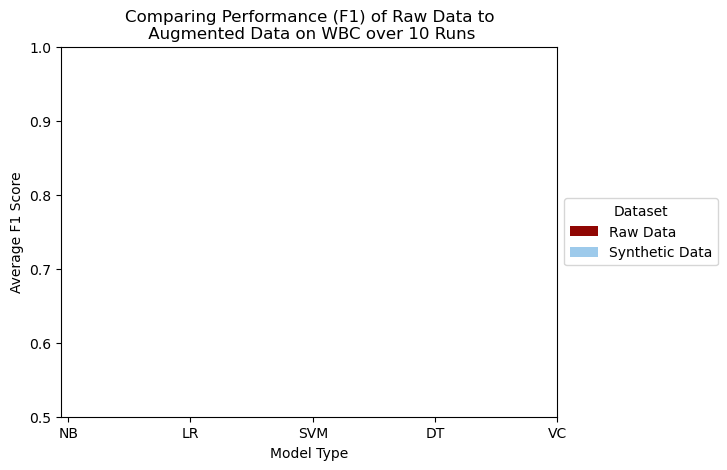

NB Difference: nan
LR Difference: nan
SVM Difference: nan
Dt Difference: nan
VC Difference: nan


In [6]:
import matplotlib.pyplot as plt 
  
X_vals = ['NB','LR','SVM', 'DT', 'VC' ]

wbc_aug = [np.mean(augNbWBC), np.mean(augLrWBC),
        np.mean(augSvmWBC), np.mean(augDtWBC), np.mean(augVcWBC)]
wbc_reg = [np.mean(nbWBC), np.mean(lrWBC),
        np.mean(svmWBC), np.mean(dtWBC), np.mean(vcWBC)]

  
X_axis = np.arange(len(X_vals))
  
plt.bar(X_axis - 0.2, wbc_reg, 0.4, label = 'Raw Data', color='#900603')
plt.bar(X_axis + 0.2, wbc_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
  
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Average F1 Score")
plt.ylim(0.5,1)
plt.title("Comparing Performance (F1) of Raw Data to\n Augmented Data on WBC over 10 Runs")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.show()

print('NB Difference: {}'.format(100 * (np.mean(augNbWBC) - np.mean(nbWBC))))
print('LR Difference: {}'.format(100 * (np.mean(augLrWBC) - np.mean(lrWBC))))
print('SVM Difference: {}'.format(100 * (np.mean(augSvmWBC) - np.mean(svmWBC))))
print('Dt Difference: {}'.format(100 * (np.mean(augDtWBC) - np.mean(dtWBC))))
print('VC Difference: {}'.format(100 * (np.mean(augVcWBC) - np.mean(vcWBC))))

In [7]:
raw_df = pd.read_csv('../../../Wisconsin_Database/breast-cancer-wisconsin.data', header=None)
cols = ['ID', 'Thickness', 'SizeUniformity', 'ShapeUniformity', 'Adhesion', 'Size', 'BareNuclei', 'Bland Chromatin', 'Nucleoli', 'Mitoses', 'Diagnosis']
raw_df.columns = cols
raw_df['Diagnosis'] = raw_df['Diagnosis'].map(
                   {2:0,4:1})

temp = []
for index, row in raw_df.iterrows():
    if '?' not in row.values:
        temp.append(row)
        
df = pd.DataFrame(np.array(temp), columns=cols)
df['BareNuclei'] = df['BareNuclei'].astype(np.int)
cols.remove('ShapeUniformity')
df = df[cols]
for i in df:
    df[i] = df[i].astype(np.int)

print(df.shape)
print(df)


(683, 10)
          ID  Thickness  SizeUniformity  Adhesion  Size  BareNuclei  \
0    1000025          5               1         1     2           1   
1    1002945          5               4         5     7          10   
2    1015425          3               1         1     2           2   
3    1016277          6               8         1     3           4   
4    1017023          4               1         3     2           1   
..       ...        ...             ...       ...   ...         ...   
678   776715          3               1         1     3           2   
679   841769          2               1         1     2           1   
680   888820          5              10         3     7           3   
681   897471          4               8         4     3           4   
682   897471          4               8         5     4           5   

     Bland Chromatin  Nucleoli  Mitoses  Diagnosis  
0                  3         1        1          0  
1                  3         2 

In [34]:
augNbWBC_stripped = []
augLrWBC_stripped = []
augSvmWBC_stripped = []
augDtWBC_stripped = []
augVcWBC_stripped = []
print(df)
for i in range(10):
    X = df[cols[1:-1]]
    y = df[cols[-1]]
    
    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    finalDataset = generateSyntheticDataset(X_train, y_train, identical = True)
    X_train = finalDataset[finalDataset.columns[:-1]]
    y_train = finalDataset[finalDataset.columns[-1]]
    scaler = StandardScaler()
    scaler.fit(X_train)

    col_names=df.columns[2:]
    scaled_df = pd.DataFrame(X_train, columns=col_names)
    scaled_df.describe().T
    augNbWBC_stripped_temp, augLrWBC_stripped_temp, augSvmWBC_stripped_temp, augDtWBC_stripped_temp, augVcWBC_stripped_temp  = trainModels(X_train, X_test, y_train, y_test)
    augNbWBC_stripped.append(augNbWBC_stripped_temp)
    augLrWBC_stripped.append(augLrWBC_stripped_temp)
    augSvmWBC_stripped.append(augSvmWBC_stripped_temp)
    augDtWBC_stripped.append(augDtWBC_stripped_temp)
    augVcWBC_stripped.append(augVcWBC_stripped_temp)
printOutputs(augNbWBC_stripped, augLrWBC_stripped, augSvmWBC_stripped, augDtWBC_stripped, augVcWBC_stripped)


          ID  Thickness  SizeUniformity  Adhesion  Size  BareNuclei  \
0    1000025          5               1         1     2           1   
1    1002945          5               4         5     7          10   
2    1015425          3               1         1     2           2   
3    1016277          6               8         1     3           4   
4    1017023          4               1         3     2           1   
..       ...        ...             ...       ...   ...         ...   
678   776715          3               1         1     3           2   
679   841769          2               1         1     2           1   
680   888820          5              10         3     7           3   
681   897471          4               8         4     3           4   
682   897471          4               8         5     4           5   

     Bland Chromatin  Nucleoli  Mitoses  Diagnosis  
0                  3         1        1          0  
1                  3         2        1  

In [8]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../../Wisconsin_Database/wdbc.data', header=None)

df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})



In [9]:
augKnnWDBC = []
augNbWDBC = []
augLrWDBC = []
augSvmWDBC = []
augDtWDBC = []
augVcWDBC = []
print('Data Shape: {}'.format(df.shape))
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    finalDataset = generateSyntheticDataset(X_train, y_train, identical = True)
    finalDataset.to_csv('Validation_Datasets/WDBC/synthetic_{}.csv'.format(i))

Data Shape: (569, 32)


In [10]:
knnWDBC = []
nbWDBC = []
lrWDBC = []
svmWDBC = []
dtWDBC = []
vcWDBC = []
for i in range(10):
    X = df[cols[2:]]
    y = df[cols[1]]
    df.to_csv('Validation_Datasets/WDBC/RAW.csv')



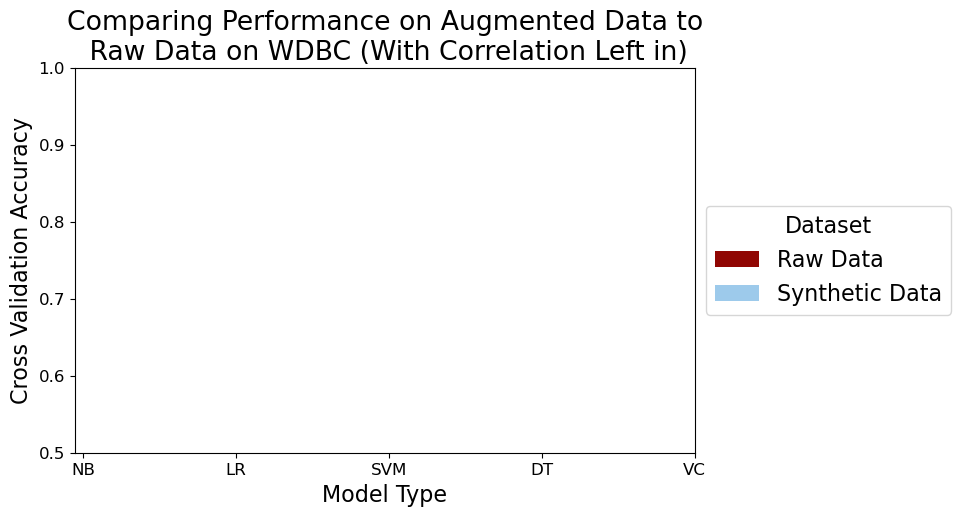

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


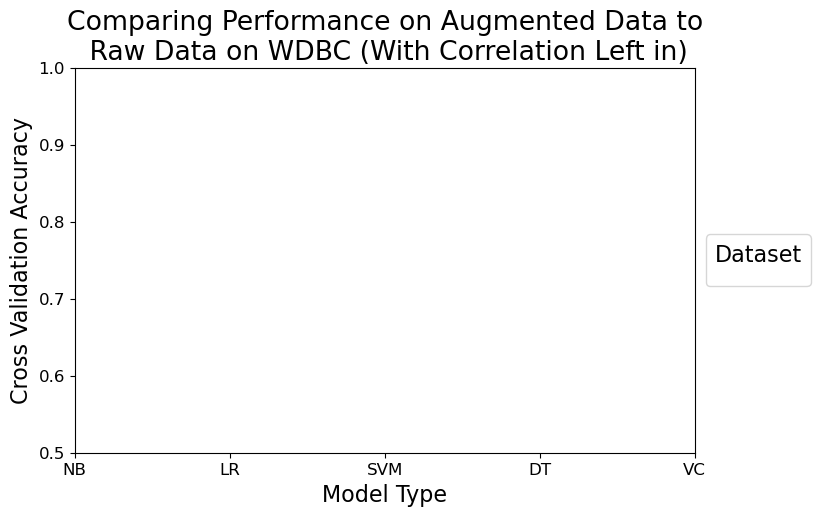

KNN Difference: nan
NB Difference: nan
LR Difference: nan
SVM Difference: nan
Dt Difference: nan
VC Difference: nan


In [11]:

wdbc_aug = [np.mean(augNbWDBC), np.mean(augLrWDBC),
        np.mean(augSvmWDBC), np.mean(augDtWDBC), np.mean(augVcWDBC)]
wdbc_reg = [np.mean(nbWDBC), np.mean(lrWDBC),
        np.mean(svmWDBC), np.mean(dtWDBC), np.mean(vcWDBC)]

  
X_axis = np.arange(len(X_vals))
  
plt.bar(X_axis - 0.2, wdbc_reg, 0.4, label = 'Raw Data', color='#900603')
plt.bar(X_axis + 0.2, wdbc_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
  
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.5,1)
plt.title("Comparing Performance on Augmented Data to\n Raw Data on WDBC (With Correlation Left in)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()


plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.5,1)
plt.title("Comparing Performance on Augmented Data to\n Raw Data on WDBC (With Correlation Left in)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()



print('KNN Difference: {}'.format(100 * (np.mean(augKnnWDBC) - np.mean(knnWDBC))))
print('NB Difference: {}'.format(100 * (np.mean(augNbWDBC) - np.mean(nbWDBC))))
print('LR Difference: {}'.format(100 * (np.mean(augLrWDBC) - np.mean(lrWDBC))))
print('SVM Difference: {}'.format(100 * (np.mean(augSvmWDBC) - np.mean(svmWDBC))))
print('Dt Difference: {}'.format(100 * (np.mean(augDtWDBC) - np.mean(dtWDBC))))
print('VC Difference: {}'.format(100 * (np.mean(augVcWDBC) - np.mean(vcWDBC))))

In [13]:
cols = ['ID', 'Diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
        'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
        'radius_MAX', 'texture_MAX', 'perimeter_MAX', 'area_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']
df = pd.read_csv('../../../Wisconsin_Database/wdbc.data', header=None)
print(df.shape)
df.columns = cols
df['Diagnosis'] = df['Diagnosis'].map(
                   {'M':True,'B':False})
#Columns Identified by Correlation Matrix
#When Columns were correlated, that which was most correlated with the target variable (Diagnosis)
#Was Kept
colsInUse = ['ID', 'Diagnosis', 'texture', 'smoothness', 'symmetry', 'fractal_dimension', 
                'radius_SE', 'texture_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
                'texture_MAX', 'perimeter_MAX', 'smoothness_MAX', 'compactness_MAX', 'concavity_MAX', 'concave_points_MAX', 'symmetry_MAX', 'fractal_dimension_MAX']

df = df[colsInUse]

print(df.shape)

(569, 32)
(569, 22)


In [14]:
augKnnWDBC_Stripped = []
augNbWDBC_Stripped = []
augLrWDBC_Stripped = []
augSvmWDBC_Stripped = []
augDtWDBC_Stripped = []
augVcWDBC_Stripped = []
print('Data Shape: {}'.format(df.shape))
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    finalDataset = generateSyntheticDataset(X_train, y_train, identical = True)
    finalDataset.to_csv('Validation_Datasets/WDBC_Stripped/synthetic_{}.csv'.format(i))


Data Shape: (569, 22)


In [15]:
knnWDBC_Stripped = []
nbWDBC_Stripped = []
lrWDBC_Stripped = []
svmWDBC_Stripped = []
dtWDBC_Stripped = []
vcWDBC_Stripped = []
for i in range(10):
    X = df[colsInUse[2:]]
    y = df[colsInUse[1]]

    SEED = 42 + i
    df.to_csv('Validation_Datasets/WDBC_Stripped/RAW.csv')

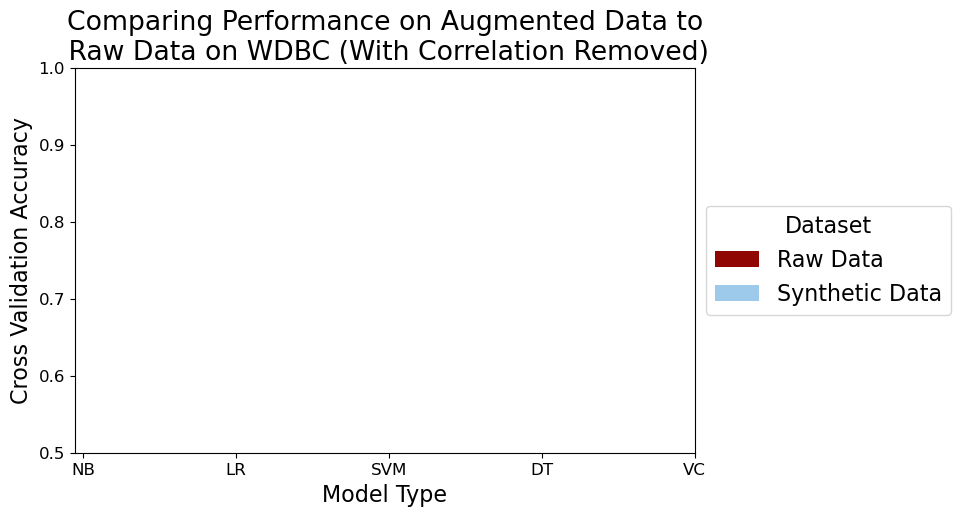

KNN Difference: nan
NB Difference: nan
LR Difference: nan
SVM Difference: nan
Dt Difference: nan
VC Difference: nan


In [16]:
wdbc_stripped_aug = [np.mean(augNbWDBC_Stripped), np.mean(augLrWDBC_Stripped),
        np.mean(augSvmWDBC_Stripped), np.mean(augDtWDBC_Stripped), np.mean(augVcWDBC_Stripped)]
wdbc_stripped_reg = [np.mean(nbWDBC_Stripped), np.mean(lrWDBC_Stripped),
        np.mean(svmWDBC_Stripped), np.mean(dtWDBC_Stripped), np.mean(vcWDBC_Stripped)]

X_axis = np.arange(len(X_vals))
  
plt.bar(X_axis - 0.2, wdbc_stripped_reg, 0.4, label = 'Raw Data', color='#900603')
plt.bar(X_axis + 0.2, wdbc_stripped_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
  
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross Validation Accuracy")
plt.ylim(0.5,1)
plt.title("Comparing Performance on Augmented Data to\n Raw Data on WDBC (With Correlation Removed)")
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

print('KNN Difference: {}'.format(100 * (np.mean(augKnnWDBC_Stripped) - np.mean(knnWDBC_Stripped))))
print('NB Difference: {}'.format(100 * (np.mean(augNbWDBC_Stripped) - np.mean(nbWDBC_Stripped))))
print('LR Difference: {}'.format(100 * (np.mean(augLrWDBC_Stripped) - np.mean(lrWDBC_Stripped))))
print('SVM Difference: {}'.format(100 * (np.mean(augSvmWDBC_Stripped) - np.mean(svmWDBC_Stripped))))
print('Dt Difference: {}'.format(100 * (np.mean(augDtWDBC_Stripped) - np.mean(dtWDBC_Stripped))))
print('VC Difference: {}'.format(100 * (np.mean(augVcWDBC_Stripped) - np.mean(vcWDBC_Stripped))))

In [18]:
def prepSurgical():
    surgicalDF = pd.read_csv('Surgical-deepnet.csv')
    surgicalDF.rename(columns = {'complication':'Diagnosis'}, inplace = True)
    for i in surgicalDF:
        surgicalDF[i] = surgicalDF[i].astype(np.float)
    return surgicalDF, surgicalDF.columns



surgicalDF, surgicalCols = prepSurgical()


augNbSurg = []
augLrSurg = []
augSvmSurg = []
augDtSurg= []
augVcSurg = []
for i in range(10):
    random.seed(42 + i)
    np.random.seed(42 + i)
    X = surgicalDF[surgicalCols[:-1]]
    y = surgicalDF[surgicalCols[-1]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)
    finalDataset = generateSyntheticDataset(X_train, y_train, identical = True)
    finalDataset.to_csv('Validation_Datasets/Surgical/synthetic_{}.csv'.format(i))


random.seed(42 + i)
np.random.seed(42 + i)

surgicalDF, surgicalCols = prepSurgical()
print(surgicalDF.shape)
smallerSurgicalDF = surgicalDF.sample(5000)
print(smallerSurgicalDF.shape)

NbSurg = []
LrSurg = []
SvmSurg = []
DtSurg= []
VcSurg = []
for i in range(10):
    surgicalDF.to_csv('Validation_Datasets/Surgical/RAW.csv')
    

(14635, 25)
(5000, 25)


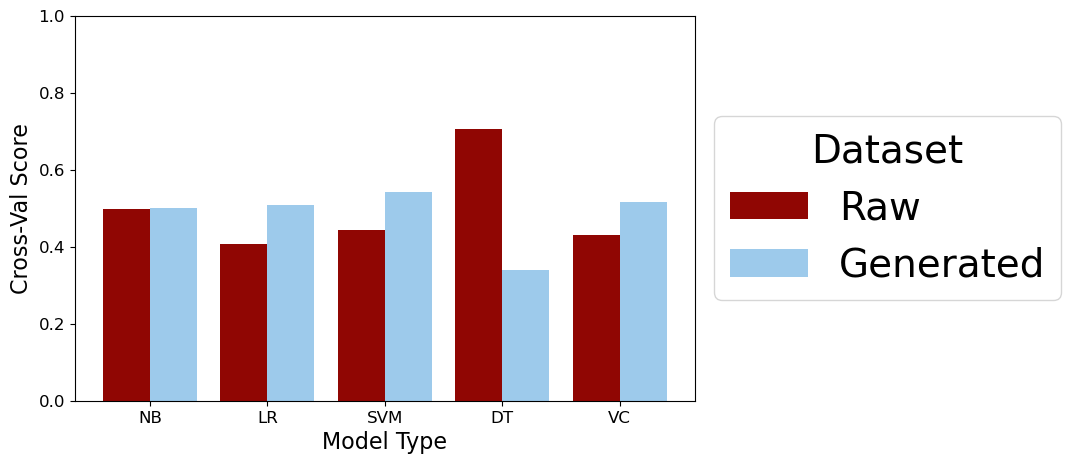

In [18]:
surg_aug = [np.mean(augNbSurg), np.mean(augLrSurg),
        np.mean(augSvmSurg), np.mean(augDtSurg), np.mean(augVcSurg)]
surg_reg = [np.mean(NbSurg), np.mean(LrSurg),
        np.mean(SvmSurg), np.mean(DtSurg), np.mean(VcSurg)]

X_vals = ['NB','LR','SVM', 'DT', 'VC' ]
X_axis = np.arange(len(X_vals))

plt.bar(X_axis - 0.2, surg_reg, 0.4, label = 'Raw', color='#900603')
plt.bar(X_axis + 0.2, surg_aug, 0.4, label = 'Generated', color='#9DCAEB')
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

[0.9629629629629629, 0.9811320754716981, 0.9724770642201834, 0.9811320754716981, 0.9811320754716981]
[0.9629629629629629, 0.9719626168224299, 0.9629629629629629, 0.5789473684210525, 0.9719626168224299]
[0.9161168304024004, 0.9321837708730898, 0.9439340298677965, 0.9020839032823856, 0.9304950462802857]
[0.9149714944123168, 0.7749933779229774, 0.8955568226013652, 0.8908640631480278, 0.887656230046369]
[0.9016699949991132, 0.9339956741870404, 0.9430333325054375, 0.8903650665411587, 0.9313920613391063]
[0.8885571526633088, 0.9397658619609839, 0.9461139149055222, 0.8952786534816563, 0.9387590865858921]


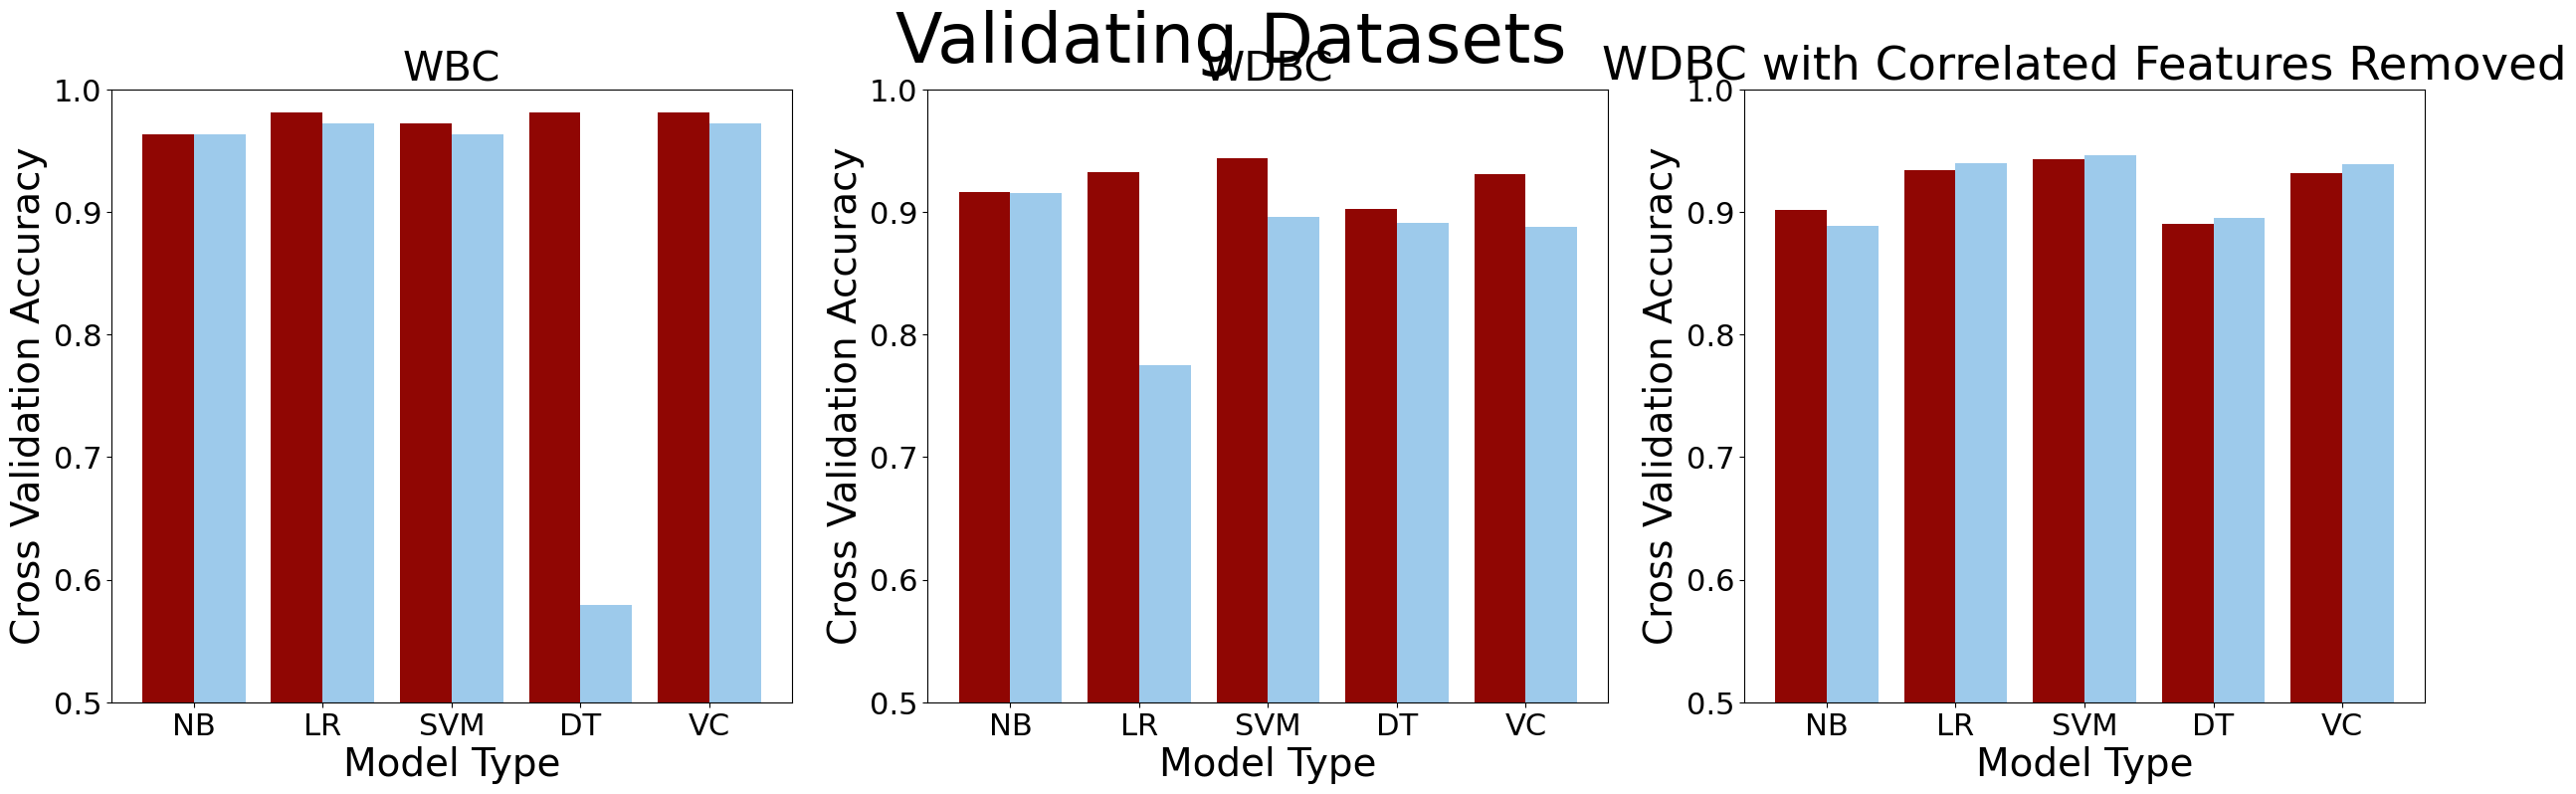

In [19]:
print(wbc_reg)
print(wbc_aug)

print(wdbc_reg)
print(wdbc_aug)

print(wdbc_stripped_reg)
print(wdbc_stripped_aug)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle('Validating Datasets', size=50)

ax1.bar(X_axis - 0.2, wbc_reg, 0.4, label = 'Raw Data', color='#900603')
ax1.bar(X_axis + 0.2, wbc_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
ax1.set_xticks(X_axis, X_vals)
ax1.set_xlabel("Model Type")
ax1.set_ylabel("Cross Validation Accuracy")
ax1.set_ylim(0.5,1)
ax1.set_title("WBC", size=30)


ax2.bar(X_axis - 0.2, wdbc_reg, 0.4, label = 'Raw Data', color='#900603')
ax2.bar(X_axis + 0.2, wdbc_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
ax2.set_xticks(X_axis, X_vals)
ax2.set_xlabel("Model Type")
ax2.set_ylabel("Cross Validation Accuracy")
ax2.set_ylim(0.5,1)
ax2.set_title("WDBC", size=30)


ax3.bar(X_axis - 0.2, wdbc_stripped_reg, 0.4, label = 'Raw Data', color='#900603')
ax3.bar(X_axis + 0.2, wdbc_stripped_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
ax3.set_xticks(X_axis, X_vals)
ax3.set_xlabel("Model Type")
ax3.set_ylabel("Cross Validation Accuracy")
ax3.set_ylim(0.5,1)
ax3.set_title("WDBC with Correlated Features Removed")




plt.show()


[0.952020635412493, 0.9565990029214463, 0.959822185952666, 0.9257183826595059, 0.9257183826595059]
[0.9510859510424237, 0.95904501818273, 0.9607617344030608, 0.6074742790459868, 0.9616361989737807]
[0.9161168304024004, 0.9321837708730898, 0.9439340298677965, 0.9086054405770433, 0.9304950462802857]
[0.9116405570738889, 0.7642873245448277, 0.8837604802220378, 0.8947968981058235, 0.8779274433834541]
[0.9016699949991132, 0.9339956741870404, 0.9430333325054375, 0.8903650665411587, 0.9313920613391063]
[0.8885571526633088, 0.9397658619609839, 0.9461139149055222, 0.8952786534816563, 0.9387590865858921]


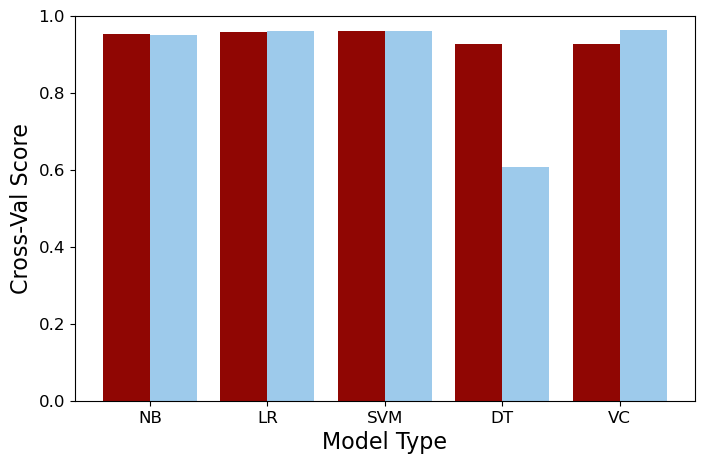

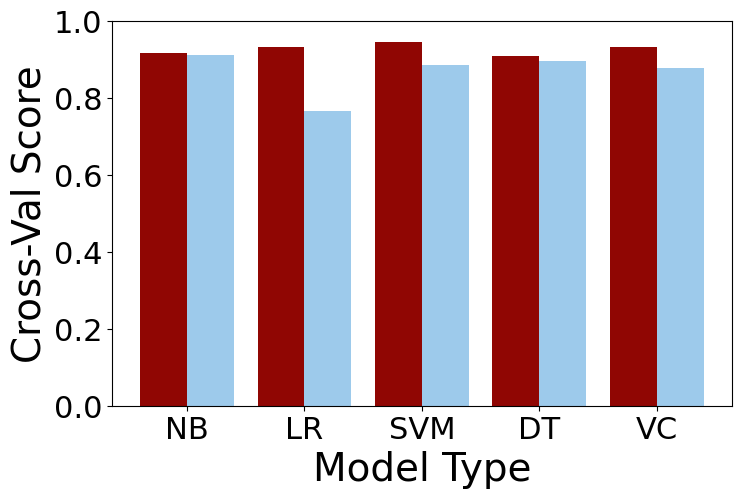

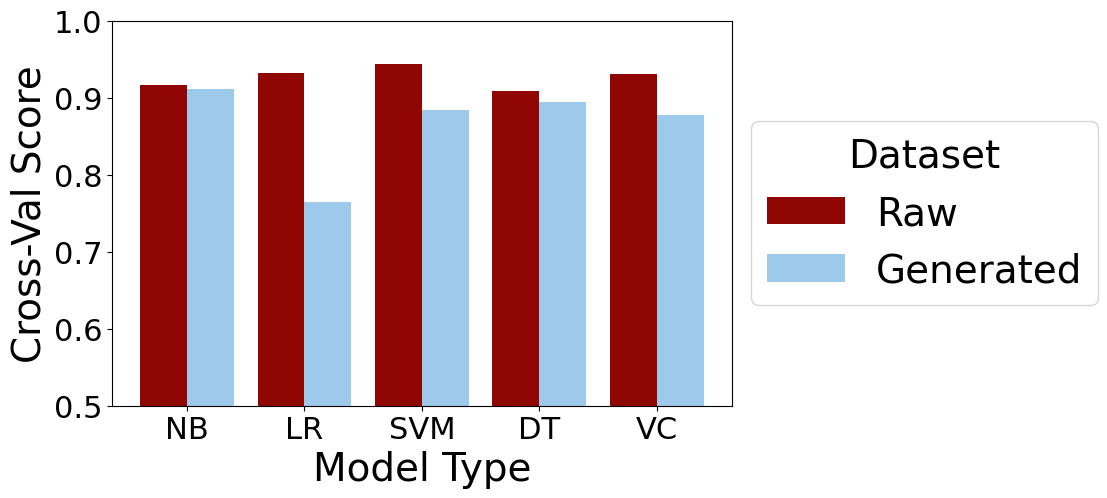

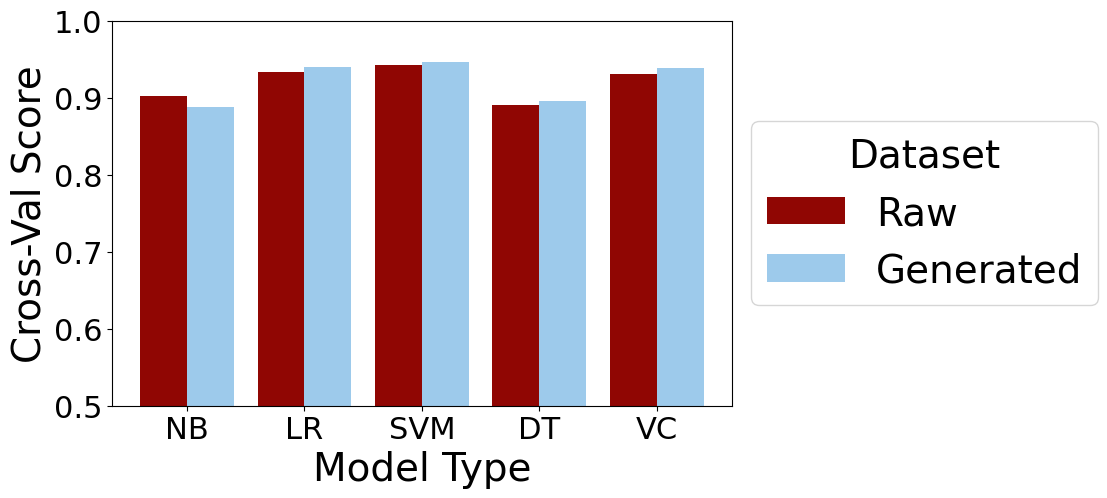

In [61]:
print(wbc_reg)
print(wbc_aug)

print(wdbc_reg)
print(wdbc_aug)

print(wdbc_stripped_reg)
print(wdbc_stripped_aug)


plt.bar(X_axis - 0.2, wbc_reg, 0.4, label = 'Raw Data', color='#900603')
plt.bar(X_axis + 0.2, wbc_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.show()


plt.bar(X_axis - 0.2, wdbc_reg, 0.4, label = 'Raw Data', color='#900603')
plt.bar(X_axis + 0.2, wdbc_aug, 0.4, label = 'Synthetic Data', color='#9DCAEB')
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.show()


plt.bar(X_axis - 0.2, wdbc_reg, 0.4, label = 'Raw', color='#900603')
plt.bar(X_axis + 0.2, wdbc_aug, 0.4, label = 'Generated', color='#9DCAEB')
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0.5,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.bar(X_axis - 0.2, wdbc_stripped_reg, 0.4, label = 'Raw', color='#900603')
plt.bar(X_axis + 0.2, wdbc_stripped_aug, 0.4, label = 'Generated', color='#9DCAEB')
plt.xticks(X_axis, X_vals)
plt.xlabel("Model Type")
plt.ylabel("Cross-Val Score")
plt.ylim(0.5,1)
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams.update({'font.size': 28})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)
plt.legend(title='Dataset',loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




plt.show()


In [60]:
titles = ['Dataset', 'Model_Type', 'Data_Type']
for i in range(10):
    titles.append('Iteration-{}'.format(i))

resultsList = []

wbc_aug = [np.mean(augNbWBC), np.mean(augLrWBC),
        np.mean(augSvmWBC), np.mean(augDtWBC), np.mean(augVcWBC)]
wbc_reg = [np.mean(nbWBC), np.mean(lrWBC),
        np.mean(svmWBC), np.mean(dtWBC), np.mean(vcWBC)]

wdbc_aug = [np.mean(augNbWDBC), np.mean(augLrWDBC),
        np.mean(augSvmWDBC), np.mean(augDtWDBC), np.mean(augVcWDBC)]
wdbc_reg = [np.mean(nbWDBC), np.mean(lrWDBC),
        np.mean(svmWDBC), np.mean(dtWDBC), np.mean(vcWDBC)]

wdbc_stripped_aug = [np.mean(augNbWDBC_Stripped), np.mean(augLrWDBC_Stripped),
        np.mean(augSvmWDBC_Stripped), np.mean(augDtWDBC_Stripped), np.mean(augVcWDBC_Stripped)]
wdbc_stripped_reg = [np.mean(nbWDBC_Stripped), np.mean(lrWDBC_Stripped),
        np.mean(svmWDBC_Stripped), np.mean(dtWDBC_Stripped), np.mean(vcWDBC_Stripped)]

surg_aug = [np.mean(augNbSurg), np.mean(augLrSurg),
        np.mean(augSvmSurg), np.mean(augDtSurg), np.mean(augVcSurg)]
surg_reg = [np.mean(NbSurg), np.mean(LrSurg),
        np.mean(SvmSurg), np.mean(DtSurg), np.mean(VcSurg)]


for i in ['WBC', 'WDBC', 'Surgical', 'WDBC_Correlation_Removed']:
    for j in range(2):
        for k in ['Naive_Bayes','Logistic_Regression','Support_Vector_Machine','Decision_Tree','Voting_Classifier']:
            resultsList.append([i, k])

resultsList[0].append('RAW')
for i in nbWBC:
    resultsList[0].append(i)

resultsList[1].append('RAW')
for i in lrWBC:
    resultsList[1].append(i)

resultsList[2].append('RAW')
for i in svmWBC:
    resultsList[2].append(i)

resultsList[3].append('RAW')
for i in dtWBC:
    resultsList[3].append(i)
    
resultsList[4].append('RAW')
for i in vcWBC:
    resultsList[4].append(i)

resultsList[5].append('Synthetic')
for i in augNbWBC:
    resultsList[5].append(i)

resultsList[6].append('Synthetic')
for i in augLrWBC:
    resultsList[6].append(i)

resultsList[7].append('Synthetic')
for i in augSvmWBC:
    resultsList[7].append(i)

resultsList[8].append('Synthetic')
for i in augDtWBC:
    resultsList[8].append(i)
    
resultsList[9].append('Synthetic')
for i in augVcWBC:
    resultsList[9].append(i)

resultsList[10].append('RAW')
for i in nbWDBC:
    resultsList[10].append(i)

resultsList[11].append('RAW')
for i in lrWDBC:
    resultsList[11].append(i)

resultsList[12].append('RAW')
for i in svmWDBC:
    resultsList[12].append(i)

resultsList[13].append('RAW')
for i in dtWDBC:
    resultsList[13].append(i)
    
resultsList[14].append('RAW')
for i in vcWDBC:
    resultsList[14].append(i)

resultsList[15].append('Synthetic')
for i in augNbWDBC:
    resultsList[15].append(i)

resultsList[16].append('Synthetic')
for i in augLrWDBC:
    resultsList[16].append(i)

resultsList[17].append('Synthetic')
for i in augSvmWDBC:
    resultsList[17].append(i)

resultsList[18].append('Synthetic')
for i in augDtWDBC:
    resultsList[18].append(i)
    
resultsList[19].append('Synthetic')
for i in augVcWDBC:
    resultsList[19].append(i)

resultsList[20].append('RAW')
for i in NbSurg:
    resultsList[20].append(i)

resultsList[21].append('RAW')
for i in LrSurg:
    resultsList[21].append(i)

resultsList[22].append('RAW')
for i in SvmSurg:
    resultsList[22].append(i)

resultsList[23].append('RAW')
for i in DtSurg:
    resultsList[23].append(i)
    
resultsList[24].append('RAW')
for i in VcSurg:
    resultsList[24].append(i)

resultsList[25].append('Synthetic')
for i in augNbSurg:
    resultsList[25].append(i)

resultsList[26].append('Synthetic')
for i in augLrSurg:
    resultsList[26].append(i)

resultsList[27].append('Synthetic')
for i in augSvmSurg:
    resultsList[27].append(i)

resultsList[28].append('Synthetic')
for i in augDtSurg:
    resultsList[28].append(i)
    
resultsList[29].append('Synthetic')
for i in augVcSurg:
    resultsList[29].append(i)

resultsList[30].append('RAW')
for i in nbWDBC_Stripped:
    resultsList[30].append(i)

resultsList[31].append('RAW')
for i in lrWDBC_Stripped:
    resultsList[31].append(i)

resultsList[32].append('RAW')
for i in svmWDBC_Stripped:
    resultsList[32].append(i)

resultsList[33].append('RAW')
for i in dtWDBC_Stripped:
    resultsList[33].append(i)
    
resultsList[34].append('RAW')
for i in vcWDBC_Stripped:
    resultsList[34].append(i)

resultsList[35].append('Synthetic')
for i in augNbWDBC_Stripped:
    resultsList[35].append(i)

resultsList[36].append('Synthetic')
for i in augLrWDBC_Stripped:
    resultsList[36].append(i)

resultsList[37].append('Synthetic')
for i in augSvmWDBC_Stripped:
    resultsList[37].append(i)

resultsList[38].append('Synthetic')
for i in augDtWDBC_Stripped:
    resultsList[38].append(i)
    
resultsList[39].append('Synthetic')
for i in augVcWDBC_Stripped:
    resultsList[39].append(i)


for i in resultsList:
    print(i)

resultsDF = pd.DataFrame(resultsList, columns=titles)
print(resultsDF)
resultsDF.to_excel('../../../RAW_DATA/Synthetic_Validation.xlsx')

['WBC', 'Naive_Bayes', 'RAW', 0.9482758620689655, 0.9215686274509803, 0.9523809523809523, 0.9375, 0.9629629629629629, 0.9696969696969697, 0.9400000000000001, 0.9724770642201834, 0.9523809523809524, 0.9629629629629629]
['WBC', 'Logistic_Regression', 'RAW', 0.9464285714285714, 0.9375000000000001, 0.9411764705882353, 0.945054945054945, 0.9719626168224299, 0.9690721649484536, 0.9400000000000001, 0.9532710280373832, 0.9803921568627451, 0.9811320754716981]
['WBC', 'Support_Vector_Machine', 'RAW', 0.9557522123893805, 0.9591836734693877, 0.9514563106796117, 0.9347826086956522, 0.9719626168224299, 0.9690721649484536, 0.9494949494949494, 0.9532710280373832, 0.9807692307692307, 0.9724770642201834]
['WBC', 'Decision_Tree', 'RAW', 0.9189189189189189, 0.826086956521739, 0.923076923076923, 0.9574468085106383, 0.9320388349514563, 0.9583333333333333, 0.9166666666666666, 0.9423076923076924, 0.9400000000000001, 0.9423076923076924]
['WBC', 'Voting_Classifier', 'RAW', 0.9189189189189189, 0.826086956521739,